# Cronic Kidney Disease Prediction

## Import required libraries and packages

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestRegressor
from tqdm.notebook import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix


## Read data from source file

In [2]:
df = pd.read_csv('dataset/kidney_disease.csv')
df.head(n=10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [3]:
df.shape

(400, 26)

## Handle Null values

In [4]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [5]:
# impuring null values

imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df_imputed = pd.DataFrame(imp_mode.fit_transform(df))
df_imputed.columns=df.columns
df_imputed

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [6]:
df_imputed.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

## Remove extra spaces, newline characters etc

In [7]:
#remove newline and unwanted /t characters

for column in df_imputed.columns:
    df_imputed[column] = df_imputed[column].astype(str).str.replace('\n', '').str.replace('\t', '').str.replace(' ', '').str.strip()


## Classification Plot

[]

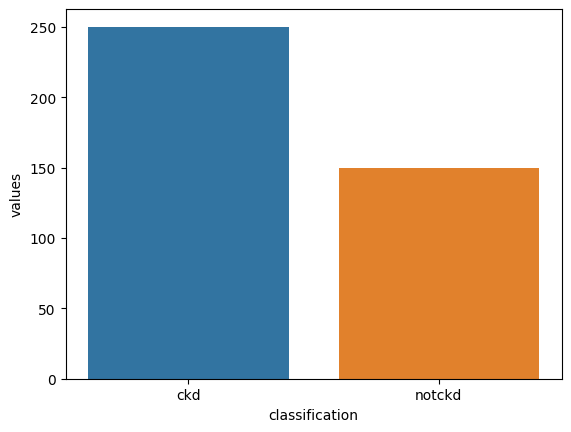

In [11]:

temp = df_imputed["classification"].value_counts()
temp_df=pd.DataFrame({'classification' : temp.index, 'values':temp.values})
sns.barplot(x='classification', y="values", data=temp_df)
plt.plot()

In [12]:
df_imputed

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [13]:
for i in df.select_dtypes(exclude=["object"]).columns:
    df_imputed[i]=df_imputed[i].apply(lambda x: float(x))

In [14]:


df_enco=df_imputed.apply(preprocessing.LabelEncoder().fit_transform)
df_enco=df_enco.drop('id',axis=1)
df_enco['bp'],df_enco['sg'],df_enco['al']=df_imputed['bp'],df_imputed['sg'],df_imputed['al']
df_enco.to_csv('dataset/preprocessed.csv',index=False)
df_enco


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,40,80.0,1.020,1.0,0,1,1,0,0,48,...,30,69,33,1,1,0,0,0,0,0
1,5,50.0,1.020,4.0,0,1,1,0,0,26,...,24,53,33,0,0,0,0,0,0,0
2,54,80.0,1.010,2.0,3,1,1,0,0,140,...,17,67,33,0,1,0,1,0,1,0
3,40,70.0,1.005,4.0,0,1,0,1,0,44,...,18,59,18,1,0,0,1,1,1,0
4,43,80.0,1.010,2.0,0,1,1,0,0,33,...,21,65,26,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,47,80.0,1.020,0.0,0,1,1,0,0,64,...,33,59,29,0,0,0,0,0,0,1
396,34,70.0,1.025,0.0,0,1,1,0,0,3,...,40,69,43,0,0,0,0,0,0,1
397,8,80.0,1.020,0.0,0,1,1,0,0,27,...,35,58,35,0,0,0,0,0,0,1
398,11,60.0,1.025,0.0,0,1,1,0,0,41,...,37,64,40,0,0,0,0,0,0,1


# Feature Selection using Random Forest Classifier

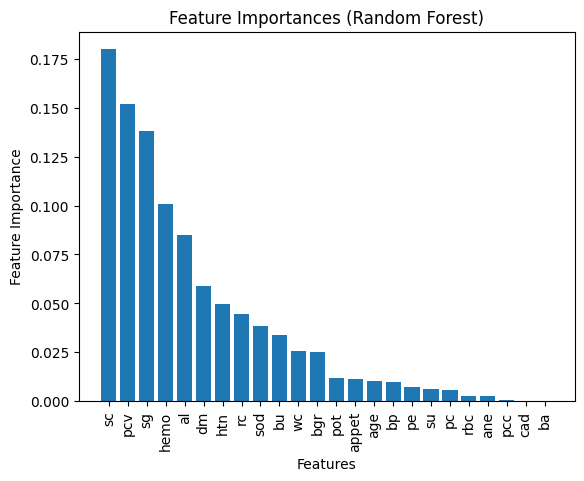

In [37]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # For classification tasks
X = df_enco.drop(columns=['classification'])
y = df_enco['classification']
rf.fit(X, y)

# Get the feature importances from the trained Random Forest model
feature_importances = rf.feature_importances_

# Create a DataFrame to store the feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features based on their importance scores in descending order
sorted_features = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.bar(sorted_features['Feature'], sorted_features['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importances (Random Forest)')
plt.show()



In [72]:
features=['sc','pcv','sg','hemo','al','classification']
df_enco=df_enco[features]
df_enco.to_csv('dataset/preprocessed.csv',index=False)

In [73]:
df=pd.read_csv('dataset/preprocessed.csv')
df['classification'].unique()
df

,sc,pcv,sg,hemo,al,classification
0,8,30,1.020,90,1.0,0
1,4,24,1.020,49,4.0,0
2,14,17,1.010,32,2.0,0
3,32,18,1.005,48,4.0,0
4,10,21,1.010,52,2.0,0
...,...,...,...,...,...,...
395,1,33,1.020,93,0.0,1
396,8,40,1.025,101,0.0,1
397,2,35,1.020,94,0.0,1
398,6,37,1.025,78,0.0,1


## Train Random Forest Model

In [76]:

# Create and train the random forest model
rf = RandomForestRegressor()
X=df.drop('classification',axis=1)
Y=df['classification']
# Define the number of iterations for training the model
n_iterations = 500

# Use tqdm.notebook to create a progress bar
with tqdm(total=n_iterations, desc="Training model") as pbar:
    for _ in range(n_iterations):
        # Perform one iteration of training
        rf.fit(X, Y)
        
        # Update the progress bar
        pbar.update(1)
print("Trained Successfully!")
# Save the trained model as a pickle file
with open('Model/model.pkl', 'wb') as f:
    pickle.dump(rf, f)


Training model:   0%|          | 0/500 [00:00<?, ?it/s]

Trained Successfully!


## Validation

In [75]:

# Load the saved random forest model from the pickle file
with open('Model/model.pkl', 'rb') as f:
    rf = pickle.load(f)

# Create a DataFrame with the same number of features as the model expects
input_data = pd.DataFrame([[24,30.0,1.005,0.0,0]])

# Use the trained random forest model to make predictions on the input data
prediction = rf.predict(input_data)

# Print the predictions or perform further evaluation
chance=prediction[0]

print(f'{chance*100}% chance of Chronic Kidney Disease!')

0.0% chance of Chronic Kidney Disease!
